In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_dir = Path("_data/2021-05-13-v2")
train_dfs = list(train_dir.glob("*test.csv.zip"))
print(train_dfs)
out_dfs = []
for k, train_df in enumerate(train_dfs):
    out_df = pd.read_csv(train_df)
    out_dfs.append(out_df)
out_df = pd.concat(out_dfs)

[PosixPath('_data/2021-05-13-v2/0-test.csv.zip'), PosixPath('_data/2021-05-13-v2/1-test.csv.zip'), PosixPath('_data/2021-05-13-v2/2-test.csv.zip'), PosixPath('_data/2021-05-13-v2/3-test.csv.zip')]


In [3]:
print(out_df)

       epoch_time  initial_batch_size  max_batch_size  batch_growth_rate  \
0    1.620929e+09                  64            4096               0.01   
1    1.620929e+09                  64            4096               0.01   
2    1.620929e+09                  64            4096               0.01   
3    1.620929e+09                  64            4096               0.01   
4    1.620929e+09                  64            4096               0.01   
..            ...                 ...             ...                ...   
196  1.620950e+09                  64              64               0.01   
197  1.620950e+09                  64              64               0.01   
198  1.620950e+09                  64              64               0.01   
199  1.620950e+09                  64              64               0.01   
200  1.620950e+09                  64              64               0.01   

     dampingfactor  dampingdelay  epochs  verbose        lr  no_cuda  ...  \
0         

In [4]:
out_df = out_df.iloc[1:]

In [4]:
out_df.dtypes

epoch_time            float64
initial_batch_size      int64
max_batch_size          int64
batch_growth_rate     float64
dampingfactor         float64
                       ...   
_batch_grad_norm      float64
_initial_loss         float64
_grad_mavg            float64
_loss_mavg            float64
_initial_factor       float64
Length: 69, dtype: object

In [5]:
out_df.describe()

,epoch_time,initial_batch_size,max_batch_size,batch_growth_rate,dampingfactor,dampingdelay,epochs,verbose,lr,random_state,...,opt_param_lr_decay,opt_param_eps,opt_param_initial_accumulator_value,_initial_norm2,_batch_grad_norm2,_batch_grad_norm,_initial_loss,_grad_mavg,_loss_mavg,_initial_factor
count,7.980000e+02,798.000000,798.000000,7.980000e+02,798.0,798.000000,798.000000,798.0,798.000000,798.0,...,201.0,2.010000e+02,201.0,1.980000e+02,198.000000,198.000000,1.980000e+02,198.000000,198.000000,1.980000e+02
mean,1.620939e+09,112.360902,13628.230576,1.000000e-02,5.0,5.498747,100.056137,5.0,0.014428,1000.0,...,0.0,1.000000e-10,0.0,9.490940e+07,0.761279,0.568532,2.302996e+00,1.026209,0.080705,1.863394e+01
std,6.125779e+03,83.398035,20007.311203,3.471623e-18,0.0,0.500312,58.216124,0.0,0.005106,0.0,...,0.0,1.295697e-26,0.0,1.493893e-08,2.618236,0.663531,4.452149e-16,0.969871,0.155406,3.561719e-15
min,1.620929e+09,64.000000,64.000000,1.000000e-02,5.0,5.000000,0.000000,5.0,0.005633,1000.0,...,0.0,1.000000e-10,0.0,9.490940e+07,0.005131,0.071629,2.302996e+00,0.071399,0.005593,1.863394e+01
25%,1.620934e+09,64.000000,64.000000,1.000000e-02,5.0,5.000000,49.808000,5.0,0.005633,1000.0,...,0.0,1.000000e-10,0.0,9.490940e+07,0.010198,0.100983,2.302996e+00,0.212242,0.009320,1.863394e+01
50%,1.620939e+09,64.000000,2048.000000,1.000000e-02,5.0,5.000000,99.960000,5.0,0.017389,1000.0,...,0.0,1.000000e-10,0.0,9.490940e+07,0.034757,0.186431,2.302996e+00,0.686936,0.021091,1.863394e+01
75%,1.620944e+09,256.000000,48000.000000,1.000000e-02,5.0,6.000000,150.324000,5.0,0.017389,1000.0,...,0.0,1.000000e-10,0.0,9.490940e+07,0.911128,0.954530,2.302996e+00,1.707613,0.084572,1.863394e+01
max,1.620950e+09,256.000000,48000.000000,1.000000e-02,5.0,6.000000,200.956083,5.0,0.017389,1000.0,...,0.0,1.000000e-10,0.0,9.490940e+07,35.122424,5.926417,2.302996e+00,6.828069,1.318163,1.863394e+01


In [6]:
df = out_df

In [ ]:
fig, ax = plt.subplots()
# ax.set_yscale("log", basey=2)
# ax.set_xlim(0, 0.2e7)

for i in out_dfs:
    print(i.damper.unique())
    
# out_dfs[0].plot(x="epochs", y="test_accuracy", ax=ax, label=out_df)
# out_dfs[1].plot(x="epochs", y="test_accuracy", ax=ax, label=out_df)
out_dfs[2].plot(x="epochs", y="test_accuracy", ax=ax, label=out_df)
# out_dfs[3].plot(x="epochs", y="test_accuracy", ax=ax, label=out_df)

In [7]:
out_df.damper.unique()

array(['geodamp', 'adagrad', 'radadamp', 'geodamplr'], dtype=object)

<ipython-input-8-a7d96a2d5a19>:2: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.set_yscale("log", basey=2)


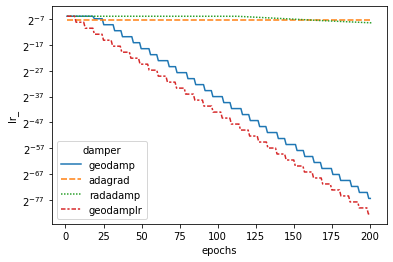

In [8]:
ax = sns.lineplot(x="epochs", y="lr_", hue="damper", data=df, ci=None, style="damper")
ax.set_yscale("log", basey=2)

<ipython-input-9-a085ad6f5759>:2: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.set_yscale("log", basey=2)


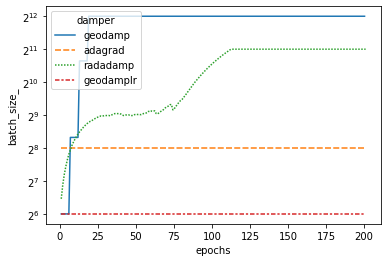

In [9]:
ax = sns.lineplot(x="epochs", y="batch_size_", hue="damper", data=df, ci=None, style="damper")
ax.set_yscale("log", basey=2)

In [ ]:
ax = sns.lineplot(x="epochs", y="damping", hue="damper", data=df, ci=None, style="damper")
ax.set_yscale("log", basey=2)

<ipython-input-11-100438c539f1>:2: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.set_yscale("log", basey=2)


(0.0, 25.0)

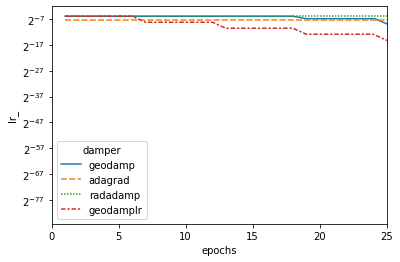

In [11]:
ax = sns.lineplot(x="epochs", y="lr_", hue="damper", data=df, ci=None, style="damper")
ax.set_yscale("log", basey=2)
ax.set_xlim(0, 25)

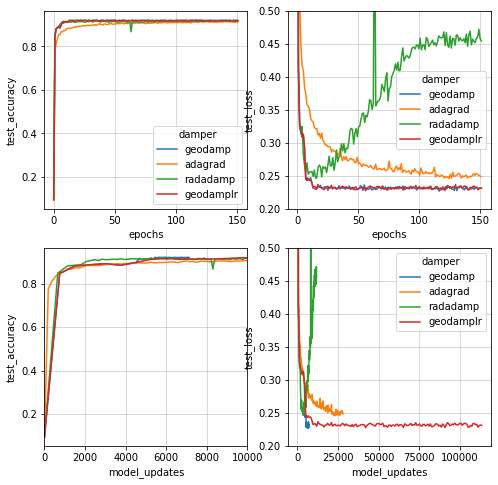

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
w = 8
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(w, w))

for i, x in enumerate(["epochs", "model_updates"]):
    for j, y in enumerate(["test_accuracy", "test_loss"]):
        idx = ~df.damper.isin([])
        show = df[idx].copy()
        show = show[show.epochs <= 150 + 1]
        ax = sns.lineplot(
            data=show,
            x=x,
            y=y,
            hue="damper",
            ax=axs[i][j],
            ci=None,
#             ci="sd",
#             ci=95,
            estimator=np.median,
        )
#         if "model" in x:
#             ax.set_xscale("log", basex=2)
#             ax.set_xlim(2**11, None)
#         if "accuracy" in y:
#             ax.set_ylim(0.85, 0.92)
        if "loss" in y:
            ax.set_ylim(0.2, 0.5)
        if "acc" in y and "updates" in x:
            ax.set_xlim(0, 10_000)
        ax.grid(alpha=0.6)
        if "acc" in y and "model" in x:
            ax.legend_.remove()